In [11]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
datafp = "/Users/davidmiles-skov/Desktop/Academics/Optimisation/02612 - Constrained Optimisation/Exam Assignment/problem1/data/"
figurefp = "/Users/davidmiles-skov/Desktop/Academics/Optimisation/02612 - Constrained Optimisation/Exam Assignment/problem1/figures/"

### 1.5 - Sparse Problem

loading data

In [34]:
def load_prob5_data(name):
    err = loadmat(datafp +"error_"+ name + ".mat")["error_"+ name]
    time = loadmat(datafp +"time_"+ name + ".mat")["time_"+ name]
    return err, time


names = ["LUdense", "LUsparse", "LDLdense", "LDLsparse", "rangespace", "nullspace"]
colours = ["mediumblue", "deepskyblue", "seagreen", "olivedrab", "maroon", "rebeccapurple"]
errors = {i: np.array([]) for i in names}
times = {i: np.array([]) for i in names}
n = np.arange(3, 1001)
for name in names:
    err, time = load_prob5_data(name)
    errors[name] = np.mean(err, 1)
    times[name] = np.mean(time, 1)

print(errors["LUdense"].shape)
print(n.shape)

(998,)
(998,)


In [54]:
def plot_errors(errors=errors, names=names, colours =colours, n=n):
    plt.figure()
    for i, name in enumerate(names):
        plt.plot(n, errors[name], label=name, alpha=0.8)
    plt.xlabel(r"$n$")
    plt.ylabel(r"$\Vert x^* - x \Vert$")
    plt.legend()
    plt.savefig(figurefp + "errors.png", dpi=600)
    plt.tight_layout()
    plt.show()

def plot_times(times=times, names=names, colours=colours, n=n):
    plt.figure()
    for i, name in enumerate(names):
        plt.plot(n, times[name], label=name, alpha=0.8)
    plt.xlabel(r"$n$")
    plt.ylabel(r"$t$ (s)")
    plt.legend()
    plt.savefig(figurefp + "times.png", dpi=600)
    plt.show()

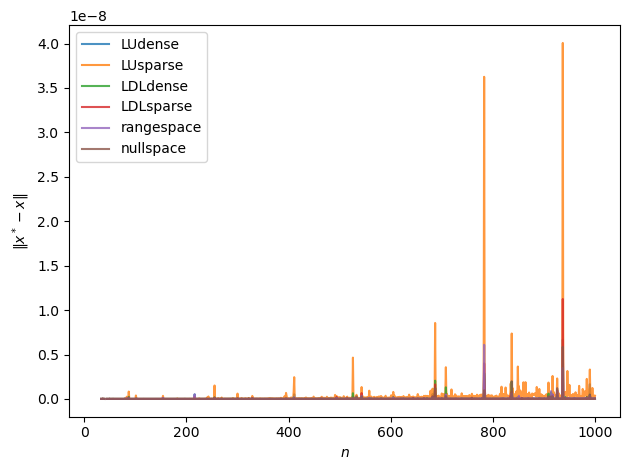

In [56]:
plot_errors()

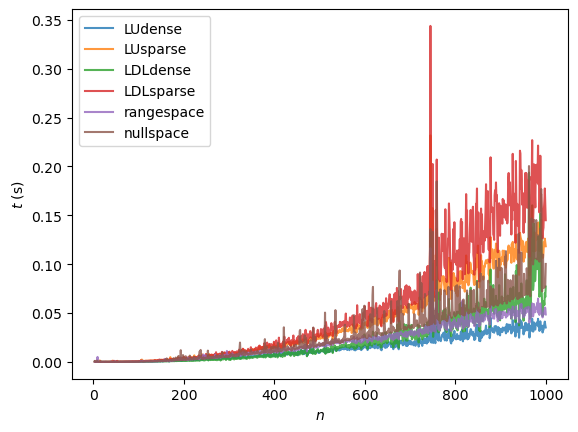

In [57]:
plot_times()

### 1.6 - Test Problem

Checking data

(1, 1000)
(1, 1000)


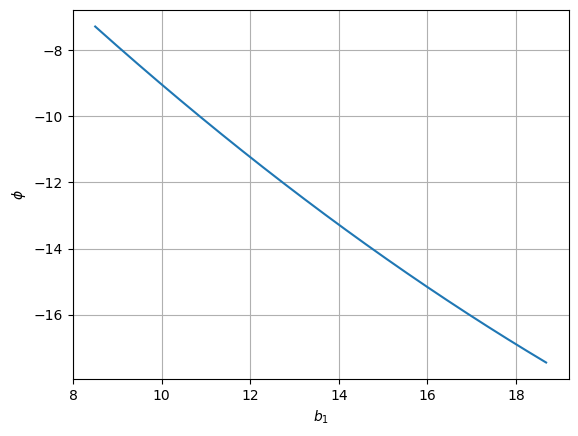

In [16]:
obj_vals = loadmat(datafp+"obj_vals.mat")['obj_vals']
b1_vals = loadmat(datafp+"b1_vals.mat")['b1_vals']

print(b1_vals.shape)
print(obj_vals.shape)


plt.plot(b1_vals.T, obj_vals.T)
plt.grid()
plt.xlabel(r"$b_1$")
plt.ylabel(r"$\phi$")
plt.show()

Actual plots

Loading data

In [17]:
# Loading data

def load_vals(name):
    x = loadmat(datafp+"x_"+name+".mat")["x_"+name]
    l = loadmat(datafp+"lambda_"+name+".mat")["lambda_"+name]
    return x, l

x_LUdense, lambda_LUdense = load_vals('LUdense')
x_LUsparse, lambda_LUsparse = load_vals('LUsparse')
x_LDLdense, lambda_LDLdense = load_vals('LDLdense')
x_LDLsparse, lambda_LDLsparse = load_vals('LDLsparse')
x_nullspace, lambda_nullspace = load_vals('nullspace')
x_rangespace, lambda_rangespace = load_vals('rangespace')


plotting solutions of all solvers:


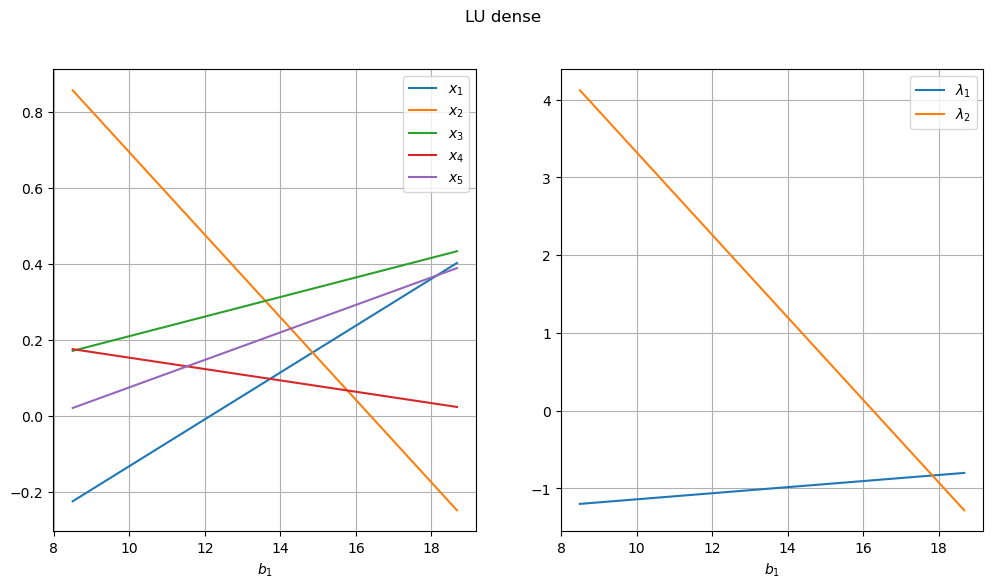

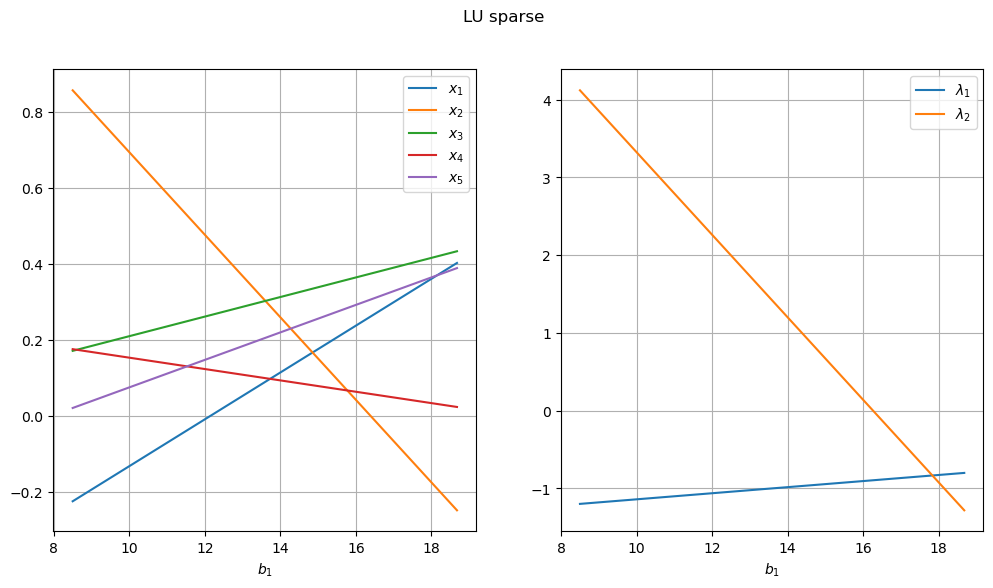

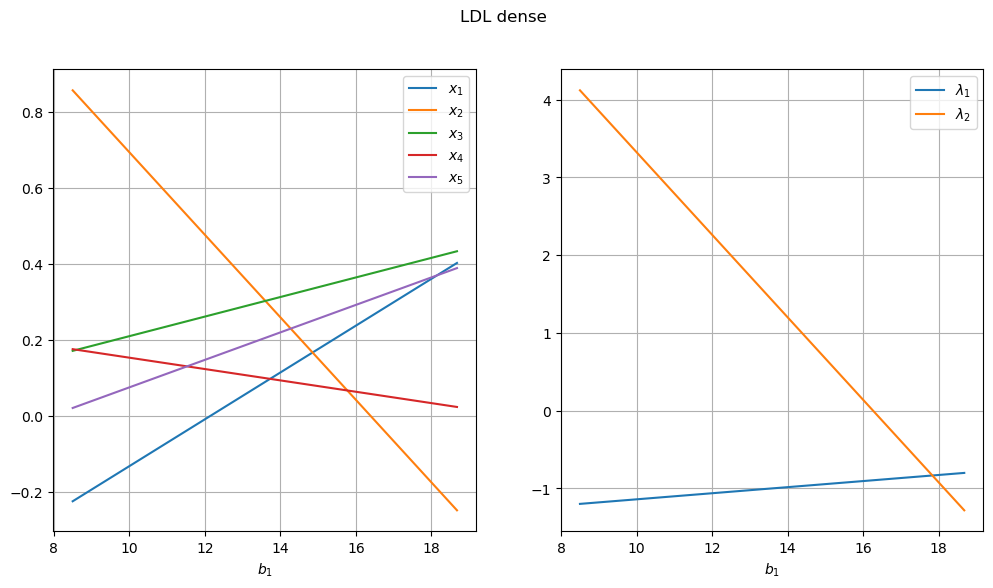

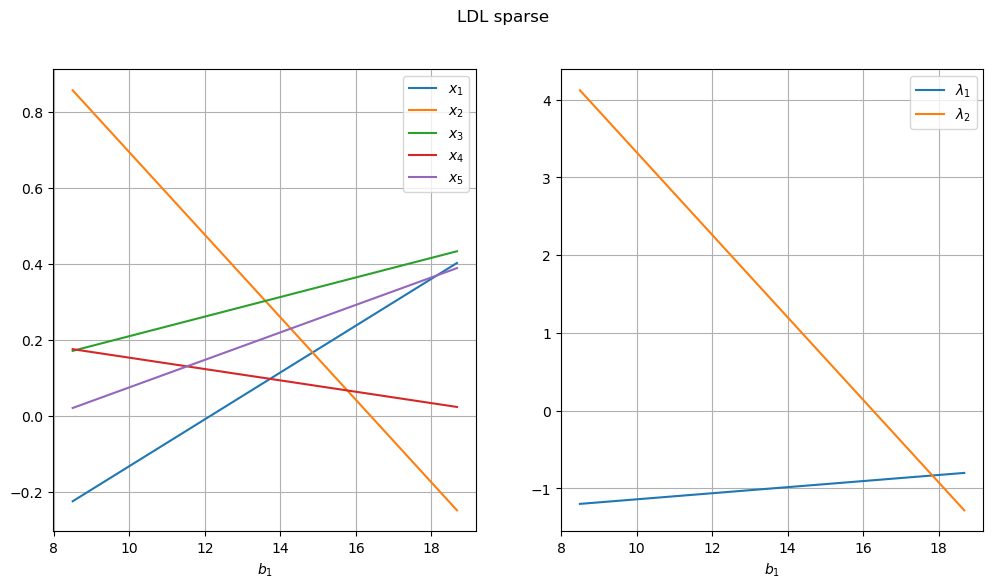

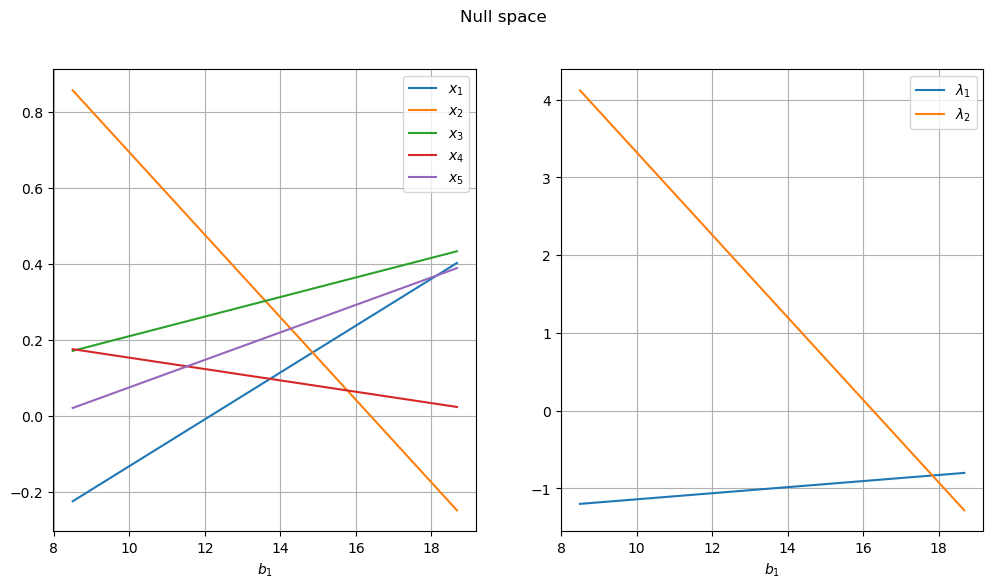

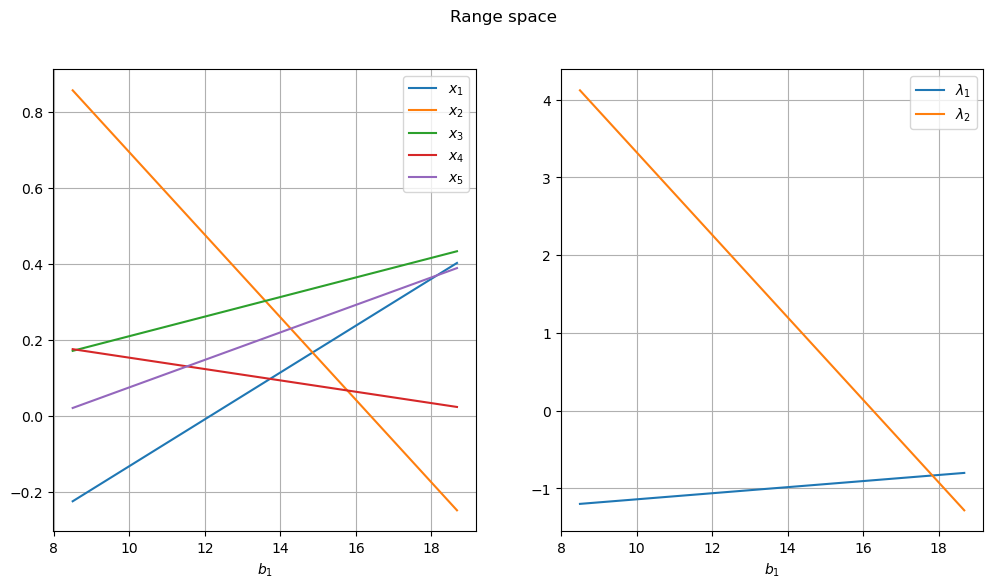

In [18]:
def plot(b1_vals, x, l, name):

    """
    Plots solutions of λ and x against b(1) values for problem 1-6.
    """

    b1_vals = b1_vals.T
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


    ax1.plot(b1_vals, x[0, :], label=r"$x_1$")
    ax1.plot(b1_vals, x[1, :], label=r"$x_2$")
    ax1.plot(b1_vals, x[2, :], label=r"$x_3$")
    ax1.plot(b1_vals, x[3, :], label=r"$x_4$")
    ax1.plot(b1_vals, x[4, :], label=r"$x_5$")

    ax1.legend()
    ax1.set_xlabel(r"$b_1$")
    ax1.grid()

    ax2.plot(b1_vals, l[0, :], label=r"$\lambda_1$")
    ax2.plot(b1_vals, l[1, :], label=r"$\lambda_2$")
    ax2.grid()
    ax2.legend()
    ax2.set_xlabel(r"$b_1$")

    plt.suptitle(name)

    plt.savefig(figurefp + name + ".png", dpi=600)


    plt.show()


xs = [x_LUdense, x_LUsparse, x_LDLdense, x_LDLsparse, x_nullspace, x_rangespace]
ls = [lambda_LUdense, lambda_LUsparse, lambda_LDLdense, lambda_LDLsparse, lambda_nullspace, lambda_rangespace]
names = ['LU dense', 'LU sparse', 'LDL dense', 'LDL sparse', 'Null space', 'Range space']


for x, l, n in zip(xs,ls, names):
    plot(b1_vals, x, l, n)